**Q1. What is the mathematical formula for a linear SVM?**

The mathematical formula for a linear Support Vector Machine (SVM) is: 

w^T * x + b = 0

where:
- w is a weight vector with the same dimensionality as your data points (x). It defines the direction of the hyperplane.
- x is a data point vector.
- b is the bias term, which determines the position of the hyperplane relative to the origin.
- ^T denotes the transpose operation.

**Q2. What is the objective function of a linear SVM?**

The objective function of a linear SVM balances two competing goals:

1. Maximizing the margin: This refers to maximizing the distance between the decision boundary (hyperplane) and the closest data points from each class. A larger margin generally translates to better generalization on unseen data.
2. Minimizing classification errors: In real-world datasets, data points might not be perfectly separable. The objective function aims to minimize the penalty for misclassified points.

Formula of the objective function for a linear SVM with a soft margin (allowing some misclassification):

0.5 * ||w||^2 + C * Σ(ξi)

where:
- 0.5 * ||w||^2 represents the term for maximizing the margin. The norm (||w||) of the weight vector (w) controls the complexity of the decision boundary. A larger norm pushes the hyperplane further away from the origin, resulting in a larger margin.
- C is a hyperparameter that controls the trade-off between maximizing the margin and minimizing misclassification errors. A higher C prioritizes a larger margin, even if it means some misclassifications.
- Σ(ξi) is the sum of slack variables (ξi) for all data points (i). Each slack variable represents the amount by which a specific data point is allowed to violate the margin constraints.
- C * Σ(ξi) represents the penalty term for misclassified points. Higher values of ξi for a data point indicate a larger violation of the margin and contribute more to the penalty.

**Q3. What is the kernel trick in SVM?**

The kernel trick is a technique used in Support Vector Machine (SVM) algorithms to implicitly map input data into higher-dimensional feature spaces. This allows SVMs to efficiently handle non-linearly separable data by transforming it into a higher-dimensional space where linear separation is possible.

In essence, the kernel trick enables SVMs to compute the decision boundary in a higher-dimensional space without explicitly needing to compute the coordinates of data points in that space. Instead, it relies on kernel functions, which are functions that compute the inner products between pairs of data points in the higher-dimensional space.

The key idea behind the kernel trick is that many algorithms, including SVMs, only rely on the inner products of data points, rather than their actual coordinates. So, instead of explicitly transforming the data into a higher-dimensional space, the kernel function calculates the inner products directly in the original space, but as if the data were mapped into the higher-dimensional space.

The most commonly used kernel functions include:

1. Linear kernel: $K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j$, which corresponds to no transformation, i.e., the inner product in the original space.
  
2. Polynomial kernel: $K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i \cdot \mathbf{x}_j + r)^d$, where $\gamma$, $r$, and $d$ are parameters.

3. Radial Basis Function (RBF) or Gaussian kernel: $K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2)$, where $\gamma$ is a parameter controlling the spread of the kernel.

4. Sigmoid kernel: $K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\gamma \mathbf{x}_i \cdot \mathbf{x}_j + r)$, where $\gamma$ and $r$ are parameters.

Using different kernel functions allows SVMs to capture various types of non-linear decision boundaries effectively. The kernel trick makes SVMs highly flexible and capable of handling complex classification tasks without explicitly transforming the data into high-dimensional spaces, thereby avoiding the computational overhead associated with such transformations.

**Q4. What is the role of support vectors in SVM? Explain with example**

In Support Vector Machines (SVM), support vectors play a critical role in defining the decision boundary, also known as the hyperplane. These are the data points that lie closest to the decision boundary, and they directly influence the positioning and orientation of the hyperplane. 

Example:

Imagine you have a dataset with two classes: blue circles and red squares. You want to find the best way to separate these two classes with a straight line.

1. First, you train an SVM on this dataset. The SVM algorithm looks for the optimal hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class. These nearest points are the support vectors.

2. The hyperplane is positioned so that it's equidistant from the nearest blue circle and the nearest red square. These nearest points are the support vectors because they're crucial in determining the hyperplane's location.

3. The hyperplane ends up being positioned in such a way that it maximizes the margin, meaning it's the widest possible gap between the nearest points of the two classes.

4. Once the SVM has found this optimal hyperplane, it can classify new data points based on which side of the hyperplane they fall. For example, if a new data point lies on the blue circle side of the hyperplane, it will be classified as a blue circle, and if it's on the red square side, it will be classified as a red square.

So, in summary, support vectors are the key data points that directly influence the position and orientation of the decision boundary (hyperplane) in an SVM. They are crucial because they determine how the SVM separates the classes and thus play a central role in the classification process.

**Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?**

Hyperplane:
- The hyperplane is the decision boundary that separates the classes in SVM.
- In a simple 2D example, it's a straight line.    

Marginal Plane:
- The marginal planes are parallel to the hyperplane and just touch the support vectors.
- They define the margin, which is the distance between the hyperplane and the support vectors.      

Soft Margin:
- In a soft-margin SVM, some points are allowed to be on the wrong side of the margin or even on the wrong side of the hyperplane, but with a penalty.
- This penalty allows for some misclassification to account for noisy data or overlapping classes.

Hard Margin:
- In a hard-margin SVM, no points are allowed to be inside the margin or on the wrong side of the hyperplane.
- This means the classes must be perfectly separable with a clear margin between them.

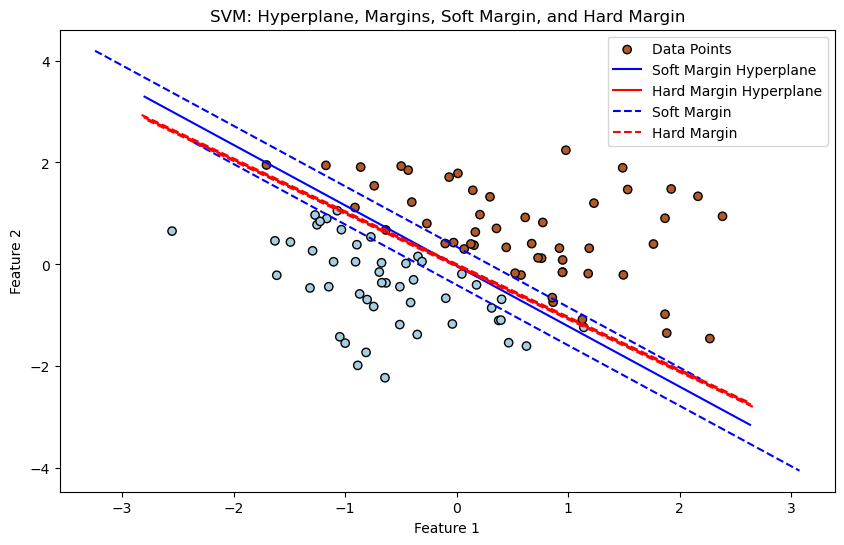

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
# Generate example data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Define SVM parameters
C_soft = 0.5  # Soft margin parameter
C_hard = 1000  # Hard margin parameter

# Fit SVM models
from sklearn.svm import SVC
svm_soft = SVC(kernel='linear', C=C_soft)
svm_hard = SVC(kernel='linear', C=C_hard)
svm_soft.fit(X, y)
svm_hard.fit(X, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', label='Data Points')

# Plot hyperplanes
w_soft = svm_soft.coef_[0]
b_soft = svm_soft.intercept_[0]
w_hard = svm_hard.coef_[0]
b_hard = svm_hard.intercept_[0]

x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

# Plot decision boundary and margins
def plot_hyperplane(w, b, color, linestyle, label):
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x_hyperplane = np.linspace(x_min, x_max)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.plot(x_hyperplane, y_hyperplane, color=color, linestyle=linestyle, label=label)

plot_hyperplane(w_soft, b_soft, color='blue', linestyle='solid', label='Soft Margin Hyperplane')
plot_hyperplane(w_hard, b_hard, color='red', linestyle='solid', label='Hard Margin Hyperplane')

# Plot margins
def plot_margin(w, b, C, color, linestyle, label):
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    margin = 1 / np.sqrt(np.sum(w ** 2))
    x_margin_up = np.linspace(x_min, x_max) + slope * margin
    y_margin_up = slope * x_margin_up + intercept + margin
    x_margin_down = np.linspace(x_min, x_max) - slope * margin
    y_margin_down = slope * x_margin_down + intercept - margin
    plt.plot(x_margin_up, y_margin_up, color=color, linestyle=linestyle)
    plt.plot(x_margin_down, y_margin_down, color=color, linestyle=linestyle, label=label)

plot_margin(w_soft, b_soft, C_soft, color='blue', linestyle='dashed', label='Soft Margin')
plot_margin(w_hard, b_hard, C_hard, color='red', linestyle='dashed', label='Hard Margin')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM: Hyperplane, Margins, Soft Margin, and Hard Margin')
plt.legend()
plt.show()


**Q6. SVM Implementation through Iris dataset.**

**- Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.**

In [ ]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [ ]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
import pandas as pd
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y=dataset.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
X=dataset.data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

**- Train a linear SVM classifier on the training set and predict the labels for the testing set.**

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC(kernel='linear')

In [64]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [65]:
y_pred = svc.predict(X_test)

**- Compute the accuracy of the model on the testing set.**

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,y_pred)

0.9736842105263158

**- Plot the decision boundaries of the trained model using two of the features.**

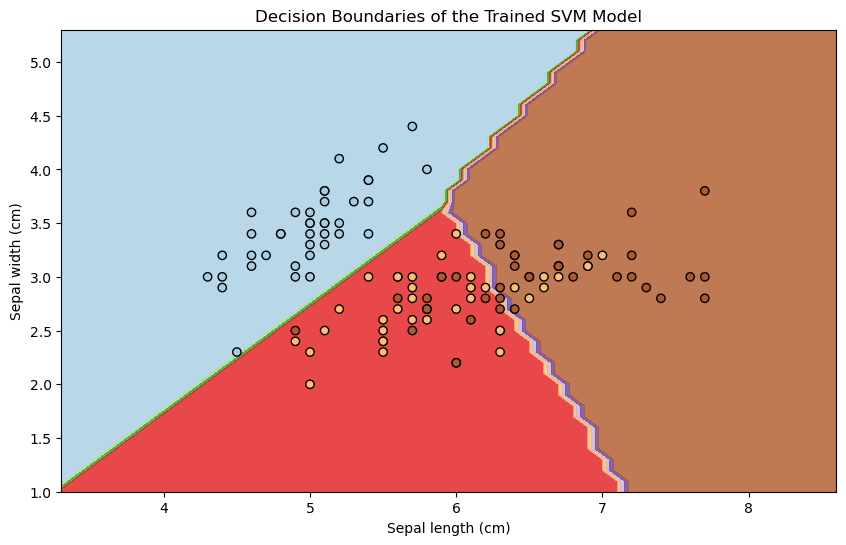

In [34]:
# Train a linear SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train[:, :2], y_train)  # Using only the first two features for visualization

# Define the range of values for the features
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class labels for the meshgrid points
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Decision Boundaries of the Trained SVM Model')
plt.show()


**- Try different values of the regularisation parameter C and see how it affects the performance of the model.**

In [22]:
C_values = [0.1, 1, 10, 100]

for C in C_values:
    # Train a linear SVM classifier with different values of C
    svm_clf = SVC(kernel='linear', C=C)
    svm_clf.fit(X_train, y_train)
    
    # Predict labels for the testing set
    y_pred = svm_clf.predict(X_test)
    
    # Compute the accuracy of the model on the testing set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of SVM with C={C}: {accuracy}")


Accuracy of SVM with C=0.1: 0.9736842105263158
Accuracy of SVM with C=1: 0.9736842105263158
Accuracy of SVM with C=10: 0.9736842105263158
Accuracy of SVM with C=100: 0.9473684210526315
